<a href="https://www.kaggle.com/code/sameekshyapati/traffic-image-classification?scriptVersionId=185890112" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


2024-06-28 09:33:19.282824: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 09:33:19.282928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 09:33:19.405991: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Path to the Kaggle input directory
input_dir = '/kaggle/input/signs-input/'

# Load the data
with open(os.path.join(input_dir, 'train.pickle'), 'rb') as f:
    train_data = pickle.load(f)
with open(os.path.join(input_dir, 'valid.pickle'), 'rb') as f:
    valid_data = pickle.load(f)
with open(os.path.join(input_dir, 'test.pickle'), 'rb') as f:
    test_data = pickle.load(f)

# Define categories
categories = pd.read_csv(os.path.join(input_dir, 'label_names.csv'))
num_classes = len(categories)


In [3]:
# Unpack data
X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# Resize images if needed (in this case, images are assumed to be 32x32)
# Convert labels to categorical
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

# Normalize images
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [4]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [5]:
# Define the CNN model
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=30, batch_size=32,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/30


2024-06-28 09:33:36.541954: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1809: 6.57455, expected 5.77917
2024-06-28 09:33:36.541996: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1873: 6.94706, expected 6.15168
2024-06-28 09:33:36.542006: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1874: 6.59592, expected 5.80054
2024-06-28 09:33:36.542014: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1877: 6.39789, expected 5.60251
2024-06-28 09:33:36.542022: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1950: 6.58588, expected 5.7905
2024-06-28 09:33:36.542030: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1970: 6.0549, expected 5.25952
2024-06-28 09:33:36.542038: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1982: 6.81896, expected 6.02358
2024-06-28 09:33:36.542046: E extern

  65/1088 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0630 - loss: 3.6664

I0000 00:00:1719567219.730983      68 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719567219.747379      68 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1082/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3090 - loss: 2.5350

2024-06-28 09:33:43.930722: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 6.27553, expected 5.28015
2024-06-28 09:33:43.930781: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.80151, expected 6.80613
2024-06-28 09:33:43.930791: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 8.23541, expected 7.24003
2024-06-28 09:33:43.930799: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 8.90594, expected 7.91057
2024-06-28 09:33:43.930807: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 8.12912, expected 7.13375
2024-06-28 09:33:43.930815: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 8.22404, expected 7.22866
2024-06-28 09:33:43.930823: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.2041, expected 6.20873
2024-06-28 09:33:43.930831: E external/local_xla/xla/ser

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3100 - loss: 2.5307

W0000 00:00:1719567228.292294      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-06-28 09:33:48.555437: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 399: 4.05616, expected 3.52536
2024-06-28 09:33:48.555490: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1811: 6.62899, expected 5.84983
2024-06-28 09:33:48.555500: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1934: 6.65621, expected 5.87704
2024-06-28 09:33:48.555508: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1950: 6.25871, expected 5.47954
2024-06-28 09:33:48.555516: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1969: 6.78208, expected 6.00291
2024-06-28 09:33:48.555524: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1970: 6.72292, expected 5.94375
2024-06-28 09:33:48.555531: E external/local_xla

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3101 - loss: 2.5300 - val_accuracy: 0.8163 - val_loss: 0.6501
Epoch 2/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7651 - loss: 0.7358 - val_accuracy: 0.9145 - val_loss: 0.3067
Epoch 3/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8565 - loss: 0.4498 - val_accuracy: 0.9417 - val_loss: 0.2003
Epoch 4/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8931 - loss: 0.3282 - val_accuracy: 0.9551 - val_loss: 0.1623
Epoch 5/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9169 - loss: 0.2679 - val_accuracy: 0.9630 - val_loss: 0.1455
Epoch 6/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9276 - loss: 0.2211 - val_accuracy: 0.9580 - val_loss: 0.1453
Epoch 7/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9309 - loss: 0.2298 - val_accuracy: 0.9601 - val_loss: 0.1662
Epoch 8/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9350 - loss: 0.2104 - val_accura

In [6]:
# Load the best model
model.load_weights('best_model.keras')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


388/395 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9676 - loss: 0.1892

2024-06-28 09:34:47.440211: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1148: 4.60734, expected 4.03055
2024-06-28 09:34:47.440273: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1810: 6.35118, expected 5.58733
2024-06-28 09:34:47.440290: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1853: 6.42517, expected 5.66132
2024-06-28 09:34:47.440303: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1874: 6.57611, expected 5.81226
2024-06-28 09:34:47.440314: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1950: 6.49972, expected 5.73588
2024-06-28 09:34:47.440325: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1957: 6.23981, expected 5.47597
2024-06-28 09:34:47.440335: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1970: 5.53321, expected 4.76936
2024-06-28 09:34:47.440350: E exte

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9676 - loss: 0.1900
Test Accuracy: 96.41%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


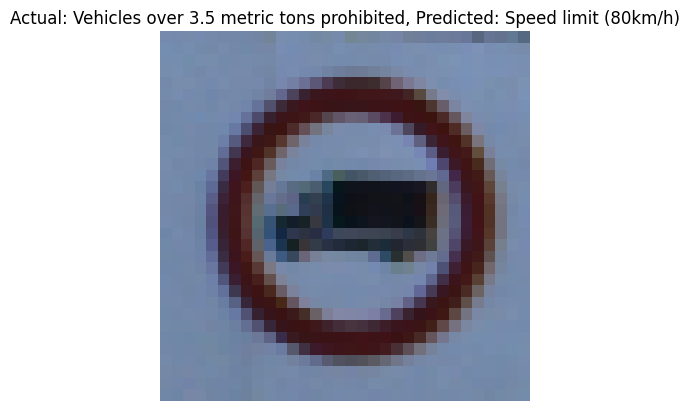

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


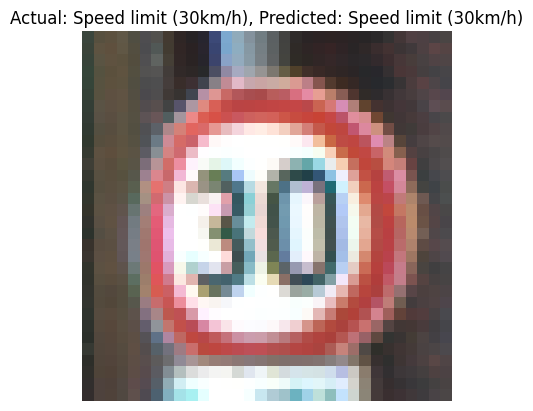

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


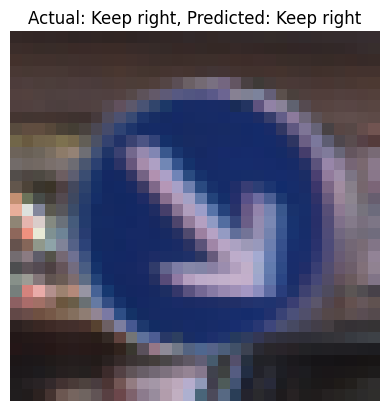

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


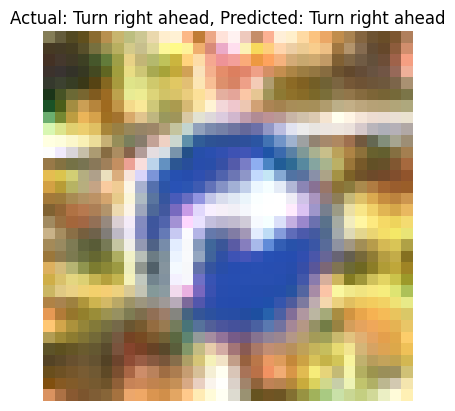

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


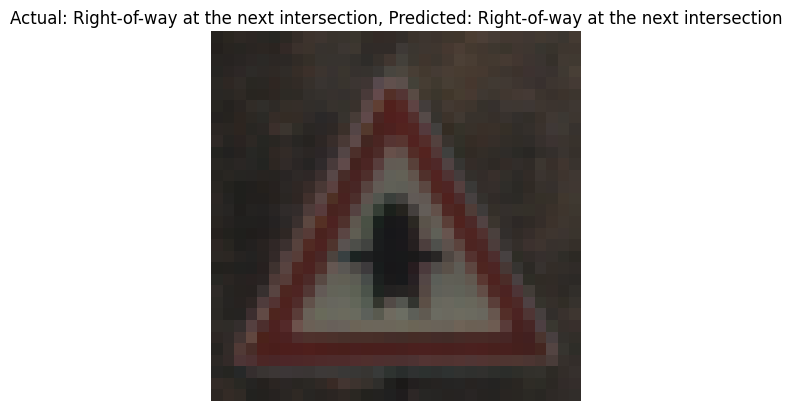

In [7]:
def display_image_with_prediction(index):
    plt.imshow(X_test[index])
    actual_class = np.argmax(y_test[index])
    predicted_class = np.argmax(model.predict(X_test[index:index+1]))
    plt.title(f"Actual: {categories['SignName'][actual_class]}, Predicted: {categories['SignName'][predicted_class]}")
    plt.axis('off')
    plt.show()

# Display a few sample predictions
for i in range(5):
    display_image_with_prediction(i)
